# Chronic Kidney Disease

## Problem Statement

a)Identify the factors causing chronic kidney disease. \
b)Build a model that can help to determine if a patient is suffering from kidney chronic disease or not. 

## Data understanding

The data is gathered for two months from patients at a hospital. You need to make utilization of the features presented in the data set for your task. The data set and a document containing the information about the attributes are attached with the assignment problem statement. 
Make yourself familiar with these attributes as these might help you in determining the patients with kidney chronic disease


## Data details

You need to use 24 + class = 25 ( 11 numeric ,14 nominal)  \
1.Age(numerical)                      : age in years \
2.Blood Pressure(numerical)           : bp in mm/Hg \
3.Specific Gravity(nominal)           : sg - (1.005,1.010,1.015,1.020,1.025) \
4.Albumin(nominal)                    : al - (0,1,2,3,4,5) \
5.Sugar(nominal)                      : su - (0,1,2,3,4,5) \
6.Red Blood Cells(nominal)            : rbc - (normal,abnormal) \
7.Pus Cell (nominal)                  : pc - (normal,abnormal) \
8.Pus Cell clumps(nominal)            : pcc - (present,notpresent) \
9.Bacteria(nominal)                   : ba - (present,notpresent) \
10.Blood Glucose Random(numerical)    : bgr in mgs/dl \
11.Blood Urea(numerical)              : bu in mgs/dl \
12.Serum Creatinine(numerical)        : sc in mgs/dl \
13.Sodium(numerical)                  : sod in mEq/L \
14.Potassium(numerical)               : pot in mEq/L \
15.Hemoglobin(numerical)              : hemo in gms \
16.Packed Cell Volume(numerical)      : \
17.White Blood Cell Count(numerical)  : wc in cells/cumm \
18.Red Blood Cell Count(numerical)    : rbcc in millions/cmm \
19.Hypertension(nominal)              : htn - (yes,no) \
20.Diabetes Mellitus(nominal)         : dm - (yes,no) \
21.Coronary Artery Disease(nominal)   : cad - (yes,no) \
22.Appetite(nominal)                  : appet - (good,poor) \
23.Pedal Edema(nominal)               : pe - (yes,no) \
24.Anemia(nominal)                    : ane - (yes,no) \
25.Class (nominal)                    : class - (ckd,notckd)

##### importing required modules

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

##### Reading data set

In [2]:
#reading data set
df = pd.read_csv("kidneyChronic.csv")

In [3]:
# setting max no. of colums to dispaly in jupyter notebook
pd.set_option("display.max_columns",50)

In [4]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


1. Numeric columns:- age,bp,bgr,bu,sc,sod, pot, hemo,cv,bcc
2. Yes/No  columns:- htn, dm, cad,pe,ane
3. Categorical columns: sc,sg,al,rbc,pc,pcc,ba,appet,class

## Data cleaning

#### checking for missing/null values

In [5]:
#checking null values row wise
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

There is no missing values, but there '?'in data, so '?' convert to null values.

In [6]:
#observed there ? in dataset, replceing '?' with nan values
df = df.replace('?',np.nan)

In [7]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.shape

(400, 25)

In [9]:
#Observed there still some ? with space, replceing '?' with nan values
df = df.replace('	?',np.nan)

All '?' converted to null values, let check the missing/null values in dataset.

In [10]:
#checking for None values row wise
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [11]:
# checking % of null values, row wise
round(100*(df.isnull().sum()/df.shape[0]))

age       2.0
bp        3.0
sg       12.0
al       12.0
su       12.0
rbc      38.0
pc       16.0
pcc       1.0
ba        1.0
bgr      11.0
bu        5.0
sc        4.0
sod      22.0
pot      22.0
hemo     13.0
pcv      18.0
wbcc     26.0
rbcc     33.0
htn       0.0
dm        0.0
cad       0.0
appet     0.0
pe        0.0
ane       0.0
class     0.0
dtype: float64

There 38% of values are missing in 'rbc' column, so droping of that column

In [12]:
df.drop(['rbc'], axis=1, inplace=True)

In [13]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [14]:
#count rows have more than 10 null values and remove those rows
df = df[df.isnull().sum(axis=1)<10]

In [15]:
df.shape

(392, 24)

In [16]:
#checking for None values row wise
df.isnull().sum()

age        9
bp        11
sg        41
al        40
su        43
pc        58
pcc        4
ba         4
bgr       41
bu        17
sc        15
sod       79
pot       80
hemo      45
pcv       63
wbcc      98
rbcc     123
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [17]:
#droping of null values of htn,dm,cad,pe,ane(yes/no)
df.dropna(subset=['htn', 'dm', 'cad','pe','ane'], inplace= True)

In [18]:
df.shape

(389, 24)

In [19]:
#checking for None values row wise
df.isnull().sum()

age        9
bp        11
sg        41
al        40
su        43
pc        58
pcc        4
ba         4
bgr       41
bu        17
sc        15
sod       79
pot       80
hemo      45
pcv       63
wbcc      98
rbcc     123
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     380 non-null    object
 1   bp      378 non-null    object
 2   sg      348 non-null    object
 3   al      349 non-null    object
 4   su      346 non-null    object
 5   pc      331 non-null    object
 6   pcc     385 non-null    object
 7   ba      385 non-null    object
 8   bgr     348 non-null    object
 9   bu      372 non-null    object
 10  sc      374 non-null    object
 11  sod     310 non-null    object
 12  pot     309 non-null    object
 13  hemo    344 non-null    object
 14  pcv     326 non-null    object
 15  wbcc    291 non-null    object
 16  rbcc    266 non-null    object
 17  htn     389 non-null    object
 18  dm      389 non-null    object
 19  cad     389 non-null    object
 20  appet   389 non-null    object
 21  pe      389 non-null    object
 22  ane     389 non-null    ob

Observed that all the column are in objects, in those some of them are numeric columns as for the document.\
converting age,bp,bgr,bu,sc,sod, pot, hemo,cv,bcc these columns into numeric

In [21]:
#convert columns to numeric
numeric_columns = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     380 non-null    float64
 1   bp      378 non-null    float64
 2   sg      348 non-null    object 
 3   al      349 non-null    object 
 4   su      346 non-null    object 
 5   pc      331 non-null    object 
 6   pcc     385 non-null    object 
 7   ba      385 non-null    object 
 8   bgr     348 non-null    float64
 9   bu      372 non-null    float64
 10  sc      374 non-null    float64
 11  sod     310 non-null    float64
 12  pot     309 non-null    float64
 13  hemo    344 non-null    float64
 14  pcv     326 non-null    float64
 15  wbcc    291 non-null    float64
 16  rbcc    266 non-null    float64
 17  htn     389 non-null    object 
 18  dm      389 non-null    object 
 19  cad     389 non-null    object 
 20  appet   389 non-null    object 
 21  pe      389 non-null    object 
 22  an

In [23]:
df.shape

(389, 24)

In [24]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4,0,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2,3,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2,0,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Data transformation

#### converting yes->1, no->0 values

In [25]:
#checking for None values row wise
df.isnull().sum()

age        9
bp        11
sg        41
al        40
su        43
pc        58
pcc        4
ba         4
bgr       41
bu        17
sc        15
sod       79
pot       80
hemo      45
pcv       63
wbcc      98
rbcc     123
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


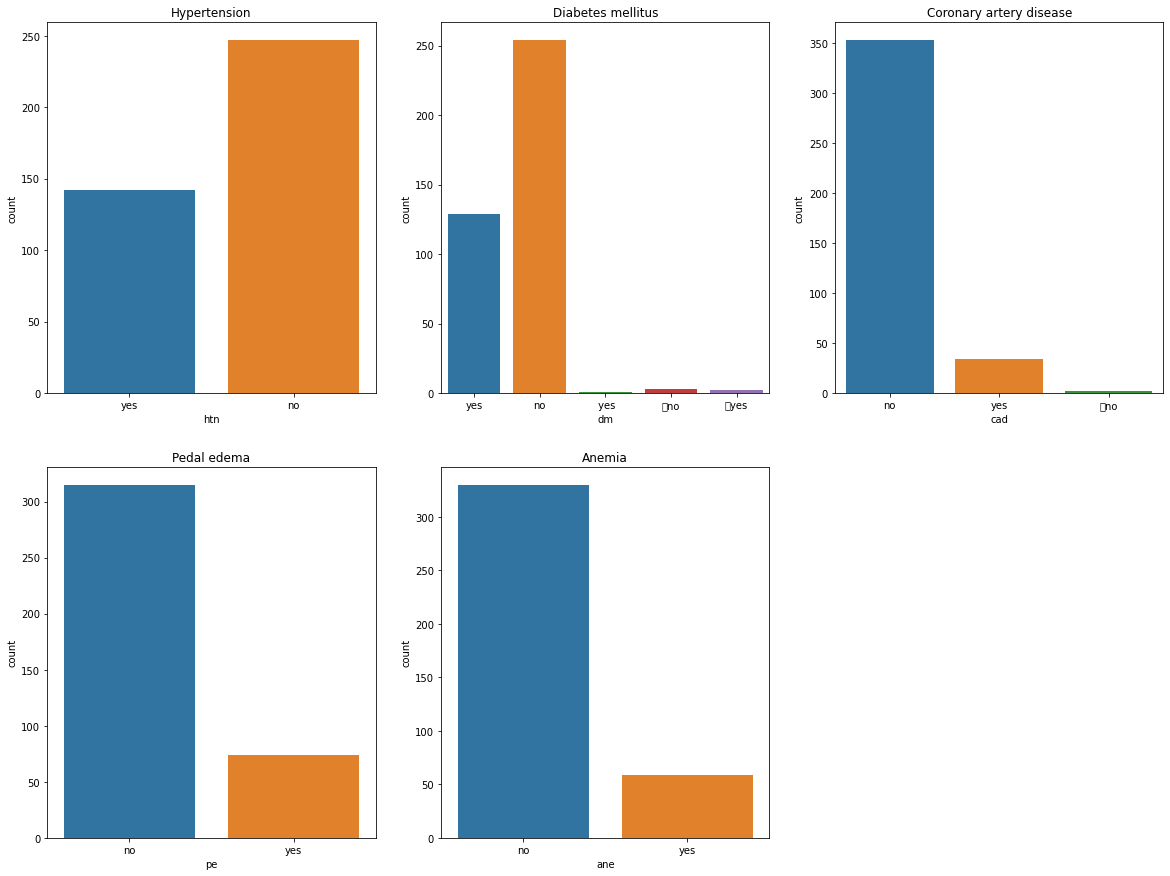

In [26]:
#plotting count values for 'htn', 'dm','cad','pe', 'ane' columns
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.title("Hypertension")
sns.countplot(x='htn', data=df)

plt.subplot(2,3,2)
plt.title("Diabetes mellitus")
sns.countplot(x='dm', data=df)

plt.subplot(2,3,3)
plt.title("Coronary artery disease")
sns.countplot(x='cad', data=df)

plt.subplot(2,3,4)
plt.title("Pedal edema")
sns.countplot(x='pe', data=df)

plt.subplot(2,3,5)
plt.title("Anemia")
sns.countplot(x='ane', data=df)

plt.show()

In [27]:
#convert 'yes'-> 1 no ->0
yes_no_columns = ['htn', 'dm','cad','pe', 'ane']
def binary_map(x):
    return x.map({'yes':1, 'no':0, ' no':0, ' yes':1})
df[yes_no_columns] = df[yes_no_columns].apply(binary_map)

In [28]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1.0,0.0,good,0,0,ckd
1,7.0,50.0,1.02,4,0,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0.0,0.0,good,0,0,ckd
2,62.0,80.0,1.01,2,3,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1.0,0.0,poor,0,1,ckd
3,48.0,70.0,1.005,4,0,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0.0,0.0,poor,1,1,ckd
4,51.0,80.0,1.01,2,0,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0.0,0.0,good,0,0,ckd


In [29]:
#checking for None values row wise
df.isnull().sum()

age        9
bp        11
sg        41
al        40
su        43
pc        58
pcc        4
ba         4
bgr       41
bu        17
sc        15
sod       79
pot       80
hemo      45
pcv       63
wbcc      98
rbcc     123
htn        0
dm         5
cad        2
appet      0
pe         0
ane        0
class      0
dtype: int64

In [30]:
#droping null rows of class
df.dropna(subset=['dm', 'cad'], inplace= True)

In [31]:
df.shape

(382, 24)

##### convert target variables to numerics

In [32]:
#get dummy values for class
class_data = pd.get_dummies(df['class'], prefix='class')
class_data.head()

,class_ckd,class_notckd
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [33]:
#dropping 'class_notckd' column
class_data.drop(['class_notckd'], axis=1, inplace=True)
class_data.head()

,class_ckd
0,1
1,1
2,1
3,1
4,1


In [34]:
# Concatenate dummy variables with df
df = pd.concat([df, class_data], axis=1)
# Drop categorical variable columns class
df.drop(['class'], axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class_ckd
0,48.0,80.0,1.02,1,0,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1.0,0.0,good,0,0,1
1,7.0,50.0,1.02,4,0,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0.0,0.0,good,0,0,1
2,62.0,80.0,1.01,2,3,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1.0,0.0,poor,0,1,1
3,48.0,70.0,1.005,4,0,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0.0,0.0,poor,1,1,1
4,51.0,80.0,1.01,2,0,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0.0,0.0,good,0,0,1


##### diaplying categorical vairable count

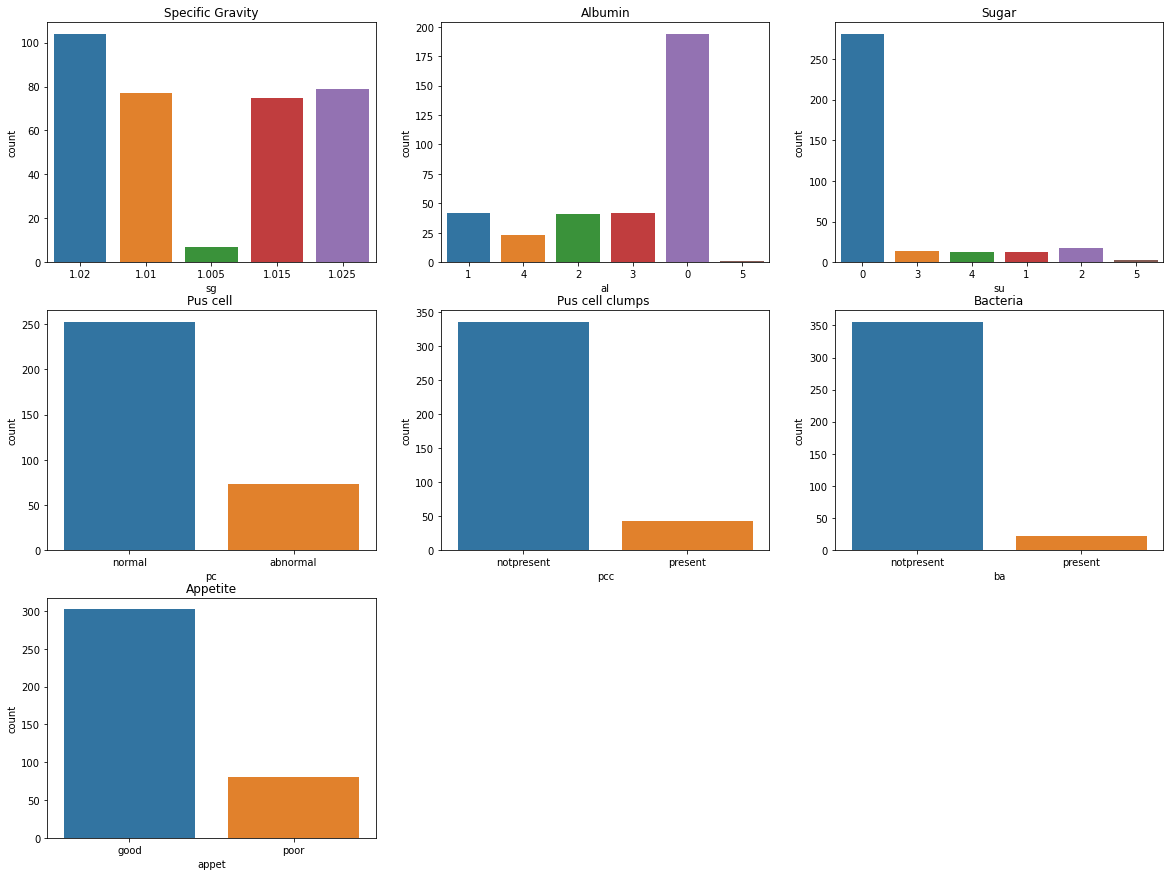

In [35]:
### draw count plot for categorical values
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.title("Specific Gravity")
sns.countplot(x='sg', data=df)

plt.subplot(3,3,2)
plt.title("Albumin")
sns.countplot(x='al', data=df)

plt.subplot(3,3,3)
plt.title("Sugar")
sns.countplot(x='su', data=df)

plt.subplot(3,3,4)
plt.title("Pus cell ")
sns.countplot(x='pc', data=df)

plt.subplot(3,3,5)
plt.title("Pus cell clumps ")
sns.countplot(x='pcc', data=df)

plt.subplot(3,3,6)
plt.title("Bacteria")
sns.countplot(x='ba', data=df)

plt.subplot(3,3,7)
plt.title("Appetite")
sns.countplot(x='appet', data=df)

plt.show()

In [36]:
#checking for None values row wise
df.isnull().sum()

age            9
bp             9
sg            40
al            39
su            41
pc            56
pcc            4
ba             4
bgr           39
bu            16
sc            14
sod           74
pot           75
hemo          42
pcv           59
wbcc          93
rbcc         118
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class_ckd      0
dtype: int64

In [37]:
df.shape

(382, 24)

Specific Gravity(sg) aroung 41 items are null values, if we observ the above graph for Specific Gravity(sg) the data is distributed across different levels almost equally.
So we can replace any value with null values. so droping null values from Specific Gravity(sg)

In [38]:
#droping null rows of class
df.dropna(subset=['sg'], inplace= True)

In [39]:
#checking for None values row wise
df.isnull().sum()

age           6
bp            8
sg            0
al            2
su            3
pc           19
pcc           4
ba            4
bgr          36
bu           16
sc           14
sod          70
pot          70
hemo         35
pcv          46
wbcc         72
rbcc         95
htn           0
dm            0
cad           0
appet         0
pe            0
ane           0
class_ckd     0
dtype: int64

In [40]:
df.shape

(342, 24)

In [41]:
#droping null rows of al,su,pc,pcc,ba
df.dropna(subset=['al','su','pc','pcc','ba'], inplace= True)

In [42]:
#checking for None values row wise
df.isnull().sum()

age           5
bp            5
sg            0
al            0
su            0
pc            0
pcc           0
ba            0
bgr          33
bu           13
sc           13
sod          66
pot          66
hemo         32
pcv          42
wbcc         68
rbcc         91
htn           0
dm            0
cad           0
appet         0
pe            0
ane           0
class_ckd     0
dtype: int64

In [43]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class_ckd
0,48.0,80.0,1.02,1,0,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1.0,0.0,good,0,0,1
1,7.0,50.0,1.02,4,0,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0.0,0.0,good,0,0,1
2,62.0,80.0,1.01,2,3,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1.0,0.0,poor,0,1,1
3,48.0,70.0,1.005,4,0,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0.0,0.0,poor,1,1,1
4,51.0,80.0,1.01,2,0,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0.0,0.0,good,0,0,1


In [44]:
#get dummy values for appet
appet_data = pd.get_dummies(df['appet'], prefix='appet', drop_first=True)
# Concatenate appet dummy variables with df
df = pd.concat([df, appet_data], axis=1)
# Drop categorical variable columns class
df.drop(['appet'], axis=1, inplace=True)

#get dummy values for sg
sg_data = pd.get_dummies(df['sg'], prefix='sg', drop_first=True)
df = pd.concat([df, sg_data], axis=1)
df.drop(['sg'], axis=1, inplace=True)

#get dummy values for al
al_data = pd.get_dummies(df['al'], prefix='al', drop_first=True)
df = pd.concat([df, al_data], axis=1)
df.drop(['al'], axis=1, inplace=True)

#get dummy values for su
su_data = pd.get_dummies(df['su'], prefix='su', drop_first=True)
df = pd.concat([df, su_data], axis=1)
df.drop(['su'], axis=1, inplace=True)

#get dummy values for pc
pc_data = pd.get_dummies(df['pc'], prefix='pc', drop_first=True)
df = pd.concat([df, pc_data], axis=1)
df.drop(['pc'], axis=1, inplace=True)


#get dummy values for pcc
pcc_data = pd.get_dummies(df['pcc'], prefix='pcc', drop_first=True)
df = pd.concat([df, pcc_data], axis=1)
df.drop(['pcc'], axis=1, inplace=True)

#get dummy values for pcc
ba_data = pd.get_dummies(df['ba'], prefix='ba', drop_first=True)
df = pd.concat([df, ba_data], axis=1)
df.drop(['ba'], axis=1, inplace=True)

df.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,pe,ane,class_ckd,appet_poor,sg_1.01,sg_1.015,sg_1.02,sg_1.025,al_1,al_2,al_3,al_4,al_5,su_1,su_2,su_3,su_4,su_5,pc_normal,pcc_present,ba_present
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1.0,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1.0,0.0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0.0,0.0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [45]:
df.shape

(319, 35)

In [46]:
#droping null rows of age
df.dropna(subset=['age'], inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

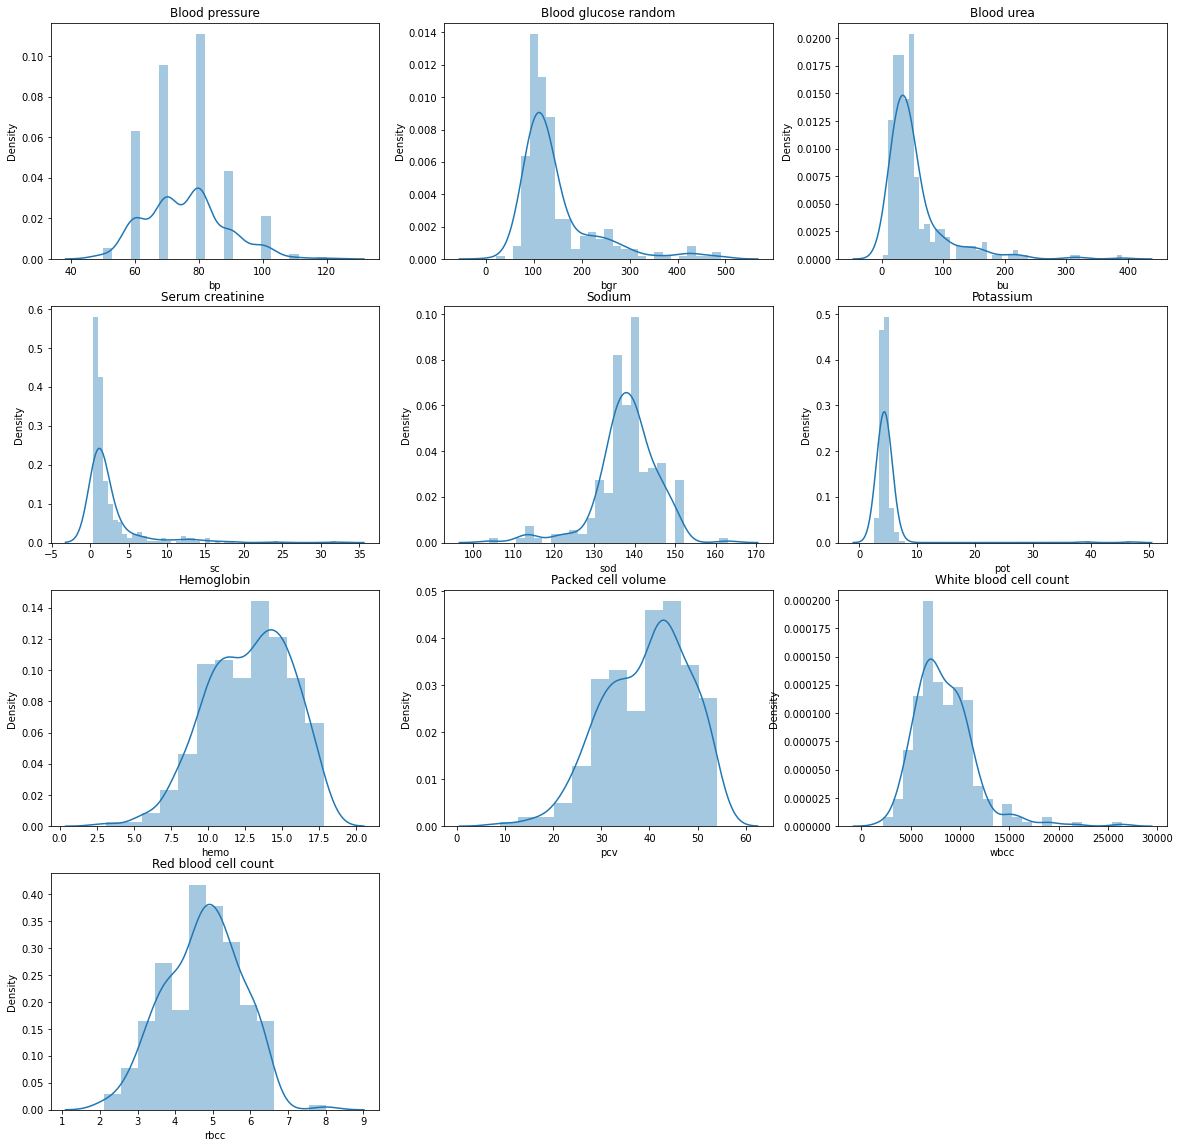

In [47]:
#draw distribution plot for numeric data
### draw count plot for categorical values
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.title("Blood pressure")
sns.distplot(df['bp'])

plt.subplot(4,3,2)
plt.title("Blood glucose random")
sns.distplot(df['bgr'])

plt.subplot(4,3,3)
plt.title("Blood urea")
sns.distplot(df['bu'])

plt.subplot(4,3,4)
plt.title("Serum creatinine ")
sns.distplot(df['sc'])

plt.subplot(4,3,5)
plt.title("Sodium")
sns.distplot(df['sod'])

plt.subplot(4,3,6)
plt.title("Potassium")
sns.distplot(df['pot'])

plt.subplot(4,3,7)
plt.title("Hemoglobin")
sns.distplot(df['hemo'])

plt.subplot(4,3,8)
plt.title("Packed cell volume")
sns.distplot(df['pcv'])

plt.subplot(4,3,9)
plt.title("White blood cell count")
sns.distplot(df['wbcc'])

plt.subplot(4,3,10)
plt.title("Red blood cell count ")
sns.distplot(df['rbcc'])

plt.show()

In [48]:
print("Bp mean:",np.mean(df.bp))
print("Bp median:",np.median(df.bp))
print('Bp mode:', stats.mode(df.bp))
print("\n")

print("bgr mean:",np.mean(df.bgr))
print("bgr median:",np.median(df.bgr))
print('bgr mode:', stats.mode(df.bgr))
print("\n")

print("bu mean:",np.mean(df.bu))
print("bu median:",np.median(df.bu))
print('bu mode:', stats.mode(df.bu))
print("\n")

print("sc mean:",np.mean(df.sc))
print("sc median:",np.median(df.sc))
print('sc mode:', stats.mode(df.sc))
print("\n")

print("sod mean:",np.mean(df.sod))
print("sod median:",np.median(df.sod))
print('sod mode:', stats.mode(df.sod))
print("\n")

print("pot mean:",np.mean(df.pot))
print("pot median:",np.median(df.pot))
print('pot mode:', stats.mode(df.pot))
print("\n")

print("hemo mean:",np.mean(df.hemo))
print("hemo median:",np.median(df.hemo))
print('hemo mode:', stats.mode(df.hemo))
print("\n")

print("pcv mean:",np.mean(df.pcv))
print("pcv median:",np.median(df.pcv))
print('pcv mode:', stats.mode(df.pcv))
print("\n")

print("wbcc mean:",np.mean(df.wbcc))
print("wbcc median:",np.median(df.wbcc))
print('wbcc mode:', stats.mode(df.wbcc))
print("\n")

print("rbcc mean:",np.mean(df.rbcc))
print("rbcc median:",np.median(df.rbcc))
print('rbcc mode:', stats.mode(df.rbcc))


Bp mean: 75.85760517799353
Bp median: nan
Bp mode: ModeResult(mode=array([80.]), count=array([100]))


bgr mean: 147.145390070922
bgr median: nan
bgr mode: ModeResult(mode=array([99.]), count=array([8]))


bu mean: 54.22956810631229
bu median: nan
bu mode: ModeResult(mode=array([46.]), count=array([12]))


sc mean: 2.5867109634551557
sc median: nan
sc mode: ModeResult(mode=array([1.2]), count=array([35]))


sod mean: 138.0557768924303
sod median: nan
sod mode: ModeResult(mode=array([135.]), count=array([32]))


pot mean: 4.680079681274901
pot median: nan
pot mode: ModeResult(mode=array([5.]), count=array([27]))


hemo mean: 12.787632508833926
hemo median: nan
hemo mode: ModeResult(mode=array([15.]), count=array([12]))


pcv mean: 39.43956043956044
pcv median: nan
pcv mode: ModeResult(mode=array([41.]), count=array([20]))


wbcc mean: 8392.369477911647
wbcc median: nan
wbcc mode: ModeResult(mode=array([6700.]), count=array([10]))


rbcc mean: 4.741409691629957
rbcc median: nan
rbcc mode

Median values printed as Nan because of middle vlaue in sequence isNan
Replace mean values with null values

In [49]:
#inserting mean values for missing(null) values for numeric columns
df['bp'].fillna(80, inplace= True) # here using mode value, 80 repeated 100 times
df['bgr'].fillna(np.mean(df.bgr), inplace= True)
df['bu'].fillna(np.mean(df.bu), inplace= True)
df['sc'].fillna(1.2, inplace= True) # here using mode value, 1.2 repeated 35 times
df['sod'].fillna(135, inplace= True) # here using mode value, 135 repeated 32 times
df['pot'].fillna(5, inplace= True) # here using mode value, 5 repeated 27 times
df['hemo'].fillna(np.mean(df.hemo), inplace= True)
df['pcv'].fillna(np.mean(df.pcv), inplace= True)
df['wbcc'].fillna(round(df.wbcc.mean()), inplace= True)
df['rbcc'].fillna(df.rbcc.mean(), inplace= True)


In [50]:
# checking null values
df.isnull().sum()

age            0
bp             0
bgr            0
bu             0
sc             0
sod            0
pot            0
hemo           0
pcv            0
wbcc           0
rbcc           0
htn            0
dm             0
cad            0
pe             0
ane            0
class_ckd      0
appet_poor     0
sg_1.01        0
sg_1.015       0
sg_1.02        0
sg_1.025       0
al_1           0
al_2           0
al_3           0
al_4           0
al_5           0
su_1           0
su_2           0
su_3           0
su_4           0
su_5           0
pc_normal      0
pcc_present    0
ba_present     0
dtype: int64

In [51]:
df.shape

(314, 35)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

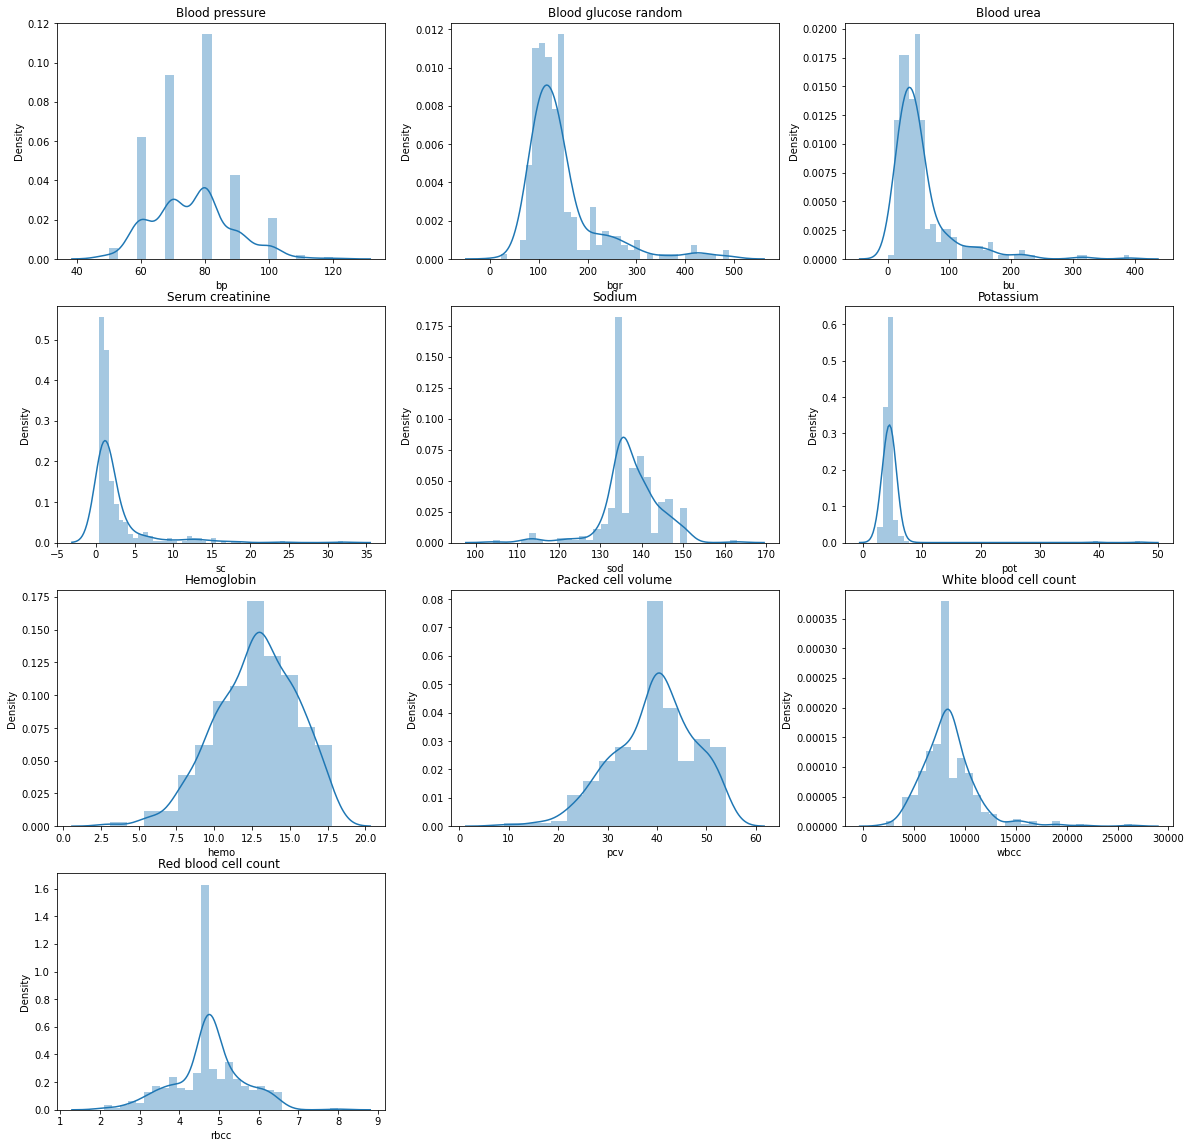

In [52]:
### draw count plot for categorical values
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.title("Blood pressure")
sns.distplot(df['bp'])

plt.subplot(4,3,2)
plt.title("Blood glucose random")
sns.distplot(df['bgr'])

plt.subplot(4,3,3)
plt.title("Blood urea")
sns.distplot(df['bu'])

plt.subplot(4,3,4)
plt.title("Serum creatinine ")
sns.distplot(df['sc'])

plt.subplot(4,3,5)
plt.title("Sodium")
sns.distplot(df['sod'])

plt.subplot(4,3,6)
plt.title("Potassium")
sns.distplot(df['pot'])

plt.subplot(4,3,7)
plt.title("Hemoglobin")
sns.distplot(df['hemo'])

plt.subplot(4,3,8)
plt.title("Packed cell volume")
sns.distplot(df['pcv'])

plt.subplot(4,3,9)
plt.title("White blood cell count")
sns.distplot(df['wbcc'])

plt.subplot(4,3,10)
plt.title("Red blood cell count ")
sns.distplot(df['rbcc'])

plt.show()

In [53]:
corr = df[['bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']].corr()

In [54]:
corr

,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
bp,1.000000,0.094671,0.186617,0.200924,-0.098009,0.087951,-0.242171,-0.268704,0.009440,-0.178559
bgr,0.094671,1.000000,0.184599,0.151644,-0.248420,0.071385,-0.306771,-0.309215,0.110745,-0.252518
bu,0.186617,0.184599,1.000000,0.801343,-0.278776,0.385255,-0.531251,-0.534373,0.045639,-0.488957
sc,0.200924,0.151644,0.801343,1.000000,-0.305042,0.349689,-0.476691,-0.486689,0.031570,-0.431021
sod,-0.098009,-0.248420,-0.278776,-0.305042,1.000000,0.096942,0.475554,0.481275,-0.058467,0.405190
pot,0.087951,0.071385,0.385255,0.349689,0.096942,1.000000,-0.121581,-0.143499,-0.072878,-0.134828
hemo,-0.242171,-0.306771,-0.531251,-0.476691,0.475554,-0.121581,1.000000,0.866631,-0.197461,0.708116
pcv,-0.268704,-0.309215,-0.534373,-0.486689,0.481275,-0.143499,0.866631,1.000000,-0.219794,0.725242
wbcc,0.009440,0.110745,0.045639,0.031570,-0.058467,-0.072878,-0.197461,-0.219794,1.000000,-0.176586
rbcc,-0.178559,-0.252518,-0.488957,-0.431021,0.405190,-0.134828,0.708116,0.725242,-0.176586,1.000000


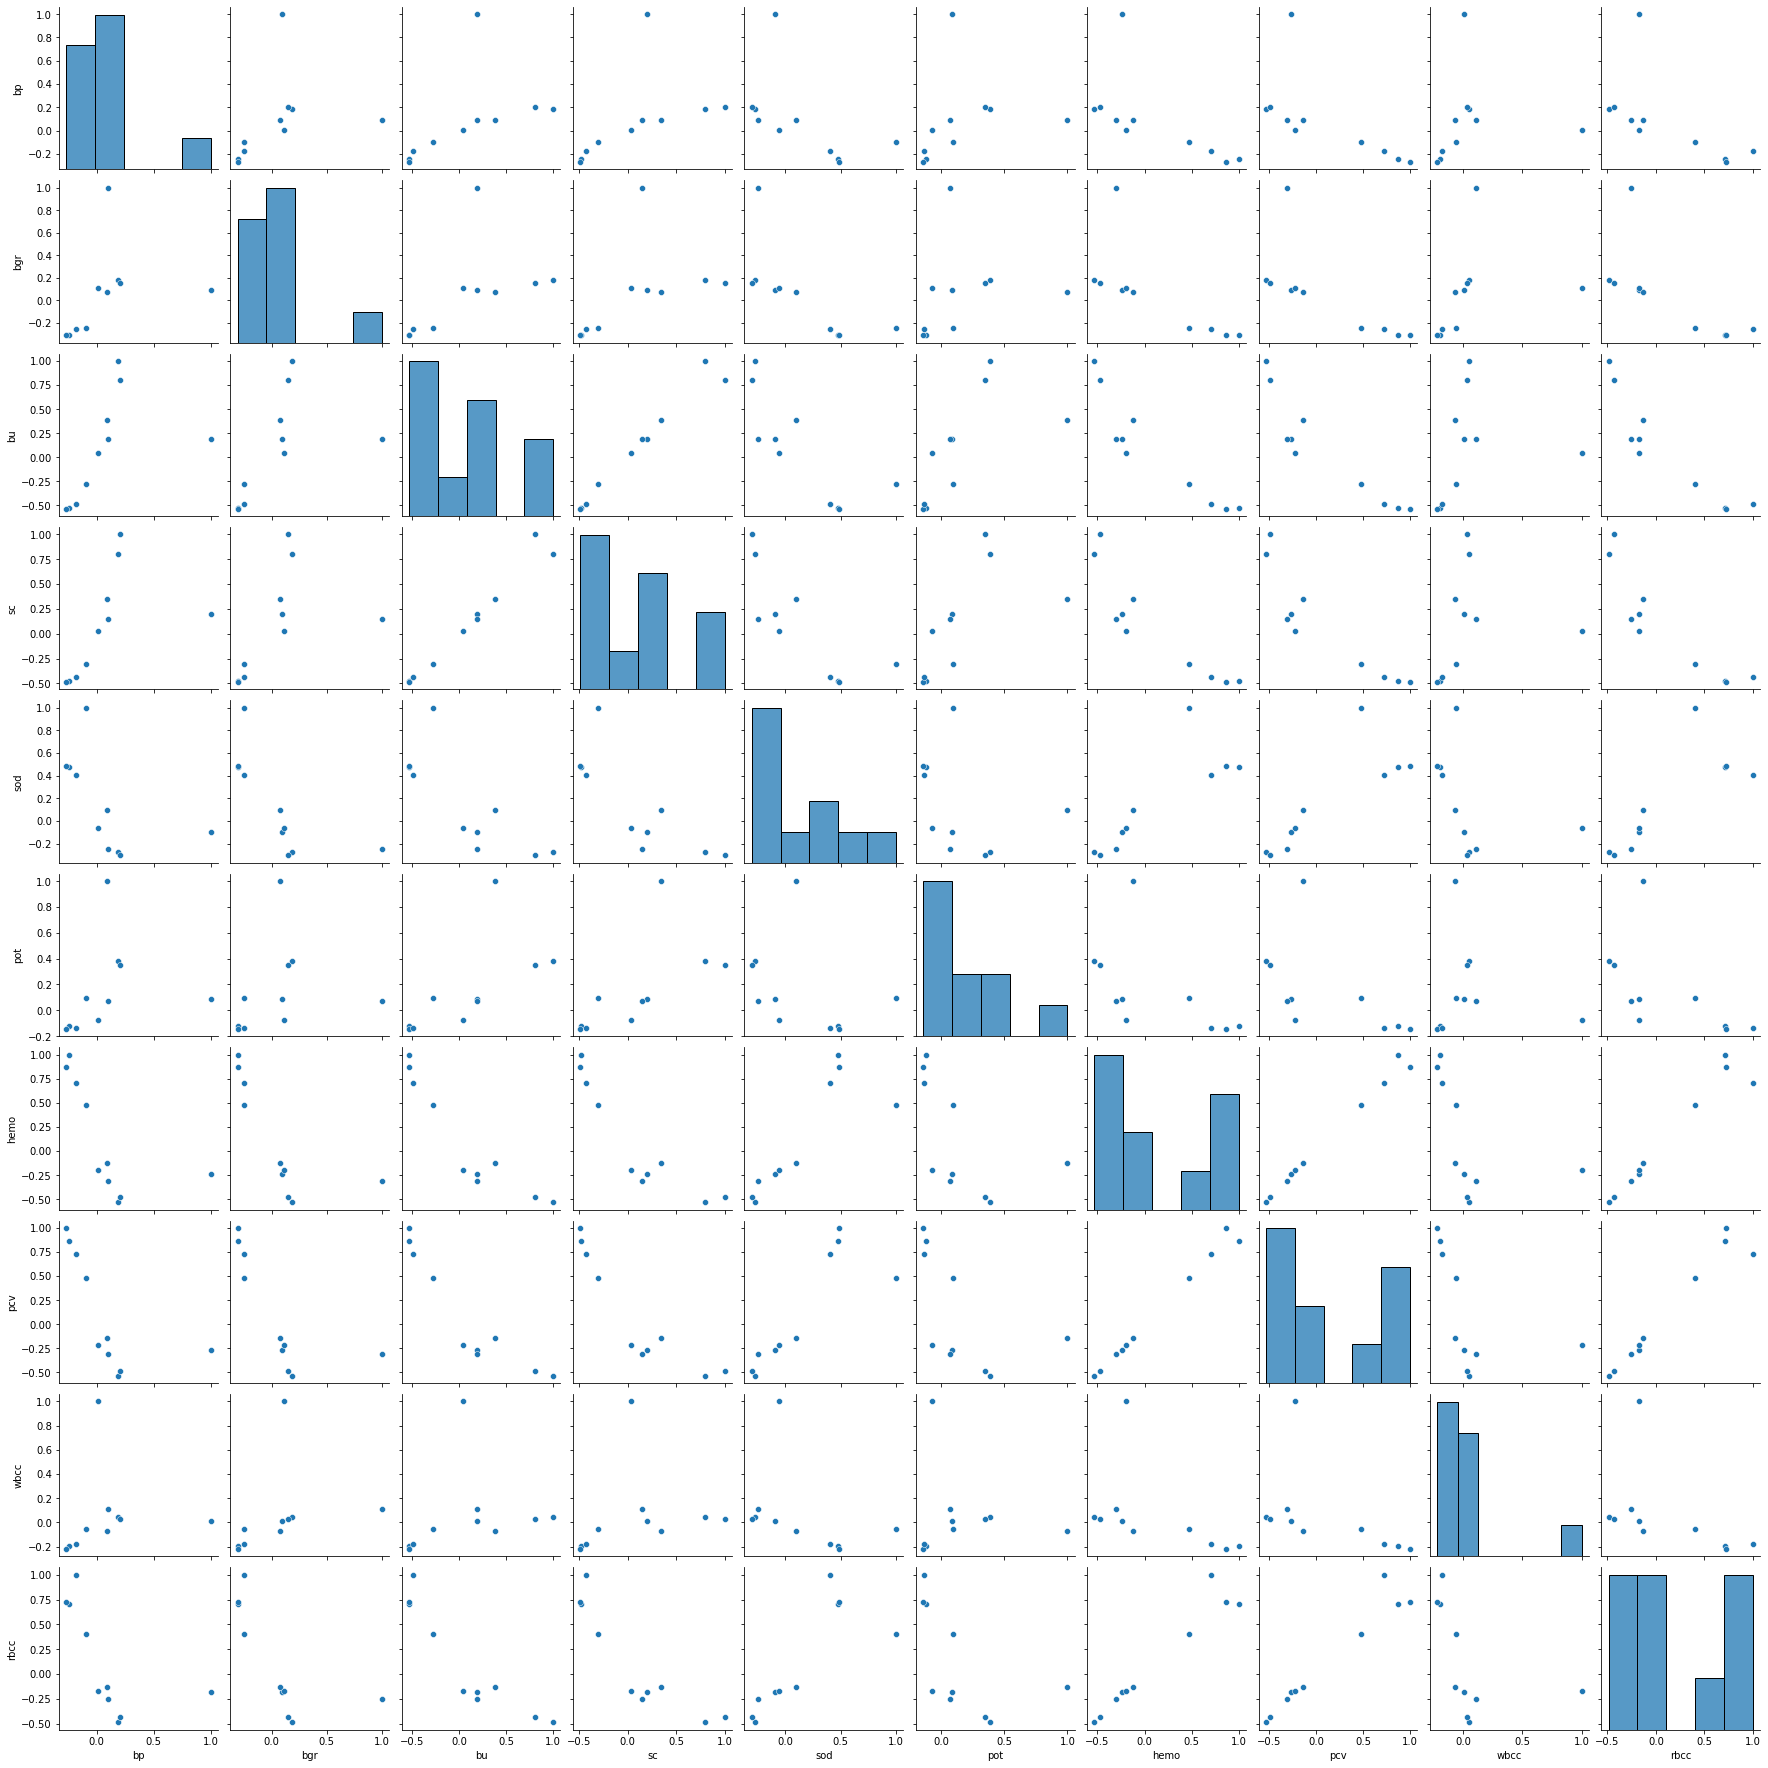

In [55]:
sns.pairplot(corr)

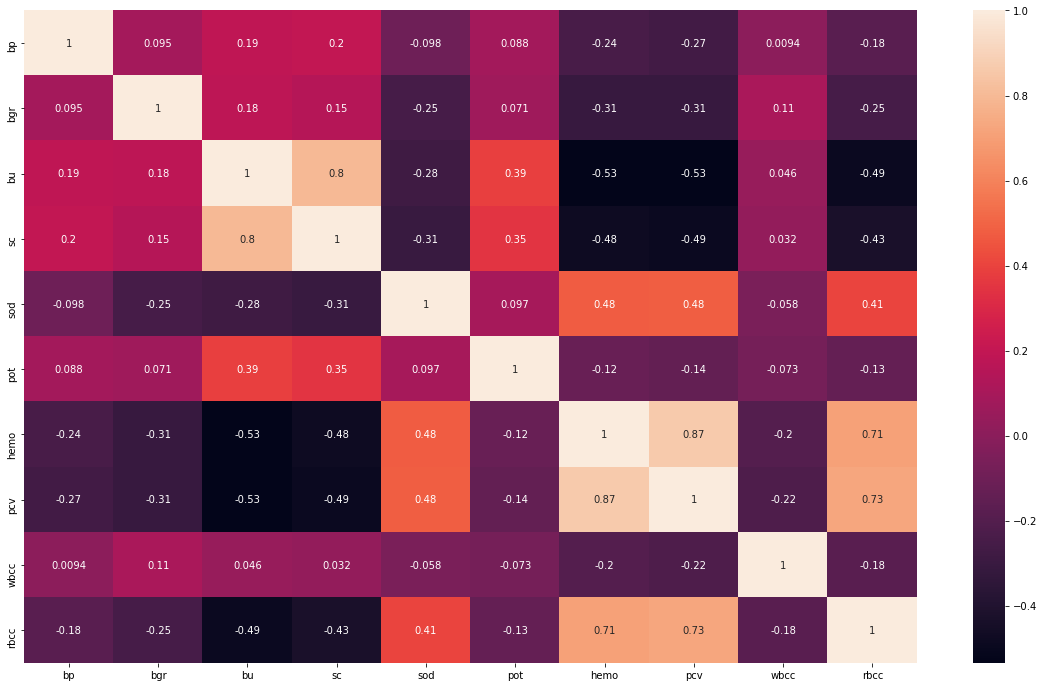

In [56]:
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

## Model building

In [57]:
x = df.drop(['class_ckd'],axis=1)
y = df['class_ckd']

In [58]:
x.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,pe,ane,appet_poor,sg_1.01,sg_1.015,sg_1.02,sg_1.025,al_1,al_2,al_3,al_4,al_5,su_1,su_2,su_3,su_4,su_5,pc_normal,pcc_present,ba_present
0,48.0,80.0,121.00000,36.0,1.2,135.0,5.0,15.4,44.0,7800.0,5.20000,1,1.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,7.0,50.0,147.14539,18.0,0.8,135.0,5.0,11.3,38.0,6000.0,4.74141,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,62.0,80.0,423.00000,53.0,1.8,135.0,5.0,9.6,31.0,7500.0,4.74141,0,1.0,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,48.0,70.0,117.00000,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.90000,1,0.0,0.0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,51.0,80.0,106.00000,26.0,1.4,135.0,5.0,11.6,35.0,7300.0,4.60000,0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [59]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class_ckd, dtype: uint8

In [60]:
#splitting data into 70% 30% for train and test.
x_train,x_test, y_train,y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
x_train.columns

Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
       'rbcc', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet_poor', 'sg_1.01',
       'sg_1.015', 'sg_1.02', 'sg_1.025', 'al_1', 'al_2', 'al_3', 'al_4',
       'al_5', 'su_1', 'su_2', 'su_3', 'su_4', 'su_5', 'pc_normal',
       'pcc_present', 'ba_present'],
      dtype='object')

In [62]:
print(numeric_columns)
df.head()

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,pe,ane,class_ckd,appet_poor,sg_1.01,sg_1.015,sg_1.02,sg_1.025,al_1,al_2,al_3,al_4,al_5,su_1,su_2,su_3,su_4,su_5,pc_normal,pcc_present,ba_present
0,48.0,80.0,121.00000,36.0,1.2,135.0,5.0,15.4,44.0,7800.0,5.20000,1,1.0,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,7.0,50.0,147.14539,18.0,0.8,135.0,5.0,11.3,38.0,6000.0,4.74141,0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,62.0,80.0,423.00000,53.0,1.8,135.0,5.0,9.6,31.0,7500.0,4.74141,0,1.0,0.0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,48.0,70.0,117.00000,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.90000,1,0.0,0.0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,51.0,80.0,106.00000,26.0,1.4,135.0,5.0,11.6,35.0,7300.0,4.60000,0,0.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [63]:
#scaling the numeric columns(normalizing columns)
scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])

<ipython-input-63-213070d6dd72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [64]:
x_train.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,pe,ane,appet_poor,sg_1.01,sg_1.015,sg_1.02,sg_1.025,al_1,al_2,al_3,al_4,al_5,su_1,su_2,su_3,su_4,su_5,pc_normal,pcc_present,ba_present
187,-2.897537,0.417651,-0.011705,-0.678821,-0.528754,-0.302206,0.037174,-0.743269,-0.596398,1.266974,-0.003307,0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
352,-0.870187,-1.245358,-0.530813,-0.197160,-0.431893,0.533791,0.010569,0.862724,1.072378,-0.529769,0.501952,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
254,-0.035396,-1.245358,-0.666900,-0.370558,-0.504539,-0.302206,-0.308691,0.115750,1.191576,-0.089059,0.501952,0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
119,0.501256,-0.413854,-0.108944,-0.582489,-0.407678,-0.302206,0.037174,0.036434,0.051988,-0.057870,-0.003307,0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41,-0.393163,-0.413854,-0.011705,-0.717354,-0.528754,-0.302206,0.037174,0.036434,0.051988,-0.057870,-0.003307,0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
#instead of removing one by one column, using RFE with 15 features
logreg_ref = LogisticRegression()
rfe= RFE(logreg_ref, 15)
rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[False False  True False  True  True False  True  True False False  True
  True False  True False  True  True  True  True  True  True False  True
 False False False False False False False False False False]
[10  7  1 14  1  1 11  1  1 16  3  1  1 15  1 13  1  1  1  1  1  1  4  1
  5 20  2 18 17  9 19  6  8 12]


In [66]:
support_features_df = pd.DataFrame({'Columns':x_train.columns, 'Support': rfe.support_,'Ranking':rfe.ranking_})

In [67]:
support_features_df

,Columns,Support,Ranking
0,age,False,10
1,bp,False,7
2,bgr,True,1
3,bu,False,14
4,sc,True,1
5,sod,True,1
6,pot,False,11
7,hemo,True,1
8,pcv,True,1
9,wbcc,False,16


In [68]:
rfe_col = x_train.columns[rfe.support_]
x_train_rfe = x_train[rfe_col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.779
Model:                            GLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     47.82
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.52e-58
Time:                        23:20:58   Log-Likelihood:                 11.288
No. Observations:                 219   AIC:                             9.423
Df Residuals:                     203   BIC:                             63.65
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6794      0.116      5.858      0.0

In [69]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.71
12,sg_1.02,11.06
13,sg_1.025,10.08
11,sg_1.015,9.28
10,sg_1.01,9.12
4,hemo,5.98
5,pcv,5.81
7,dm,2.12
6,htn,2.08
8,pe,1.57


P-value of "appet_poor" is 0.785 more hence droping of this feature.  And p-value should <= 0.05

In [70]:
x_train_rfe.drop('appet_poor', axis = 1, inplace = True)

In [71]:
#rebuilding the model
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.779
Model:                            GLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     51.47
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           4.99e-59
Time:                        23:20:58   Log-Likelihood:                 11.248
No. Observations:                 219   AIC:                             7.504
Df Residuals:                     204   BIC:                             58.34
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6806      0.116      5.884      0.0

In [72]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.65
11,sg_1.02,11.06
12,sg_1.025,10.08
10,sg_1.015,9.28
9,sg_1.01,9.12
4,hemo,5.91
5,pcv,5.80
6,htn,2.08
7,dm,2.07
1,bgr,1.54


P-value of "pcv" is 0.778 more hence droping of this feature. And p-value should <= 0.05

In [73]:
x_train_rfe.drop('pcv', axis = 1, inplace = True)

In [74]:
#rebuilding the model
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.779
Model:                            GLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     55.67
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           6.80e-60
Time:                        23:20:58   Log-Likelihood:                 11.205
No. Observations:                 219   AIC:                             5.590
Df Residuals:                     205   BIC:                             53.04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6802      0.115      5.895      0.0

P-value of "sg_1.01" is 0.749 more hence droping of this feature. And p-value should <= 0.05

In [75]:
x_train_rfe.drop('sg_1.01', axis = 1, inplace = True)

In [76]:
#rebuilding the model
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.779
Model:                            GLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     60.56
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           8.98e-61
Time:                        23:20:58   Log-Likelihood:                 11.150
No. Observations:                 219   AIC:                             3.699
Df Residuals:                     206   BIC:                             47.76
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7146      0.042     17.000      0.0

P-value of "dm" is 0.481 more hence droping of this feature. And p-value should <= 0.05

In [77]:
x_train_rfe.drop('dm', axis = 1, inplace = True)

In [78]:
#rebuilding the model
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.779
Model:                            GLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     66.18
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           1.37e-61
Time:                        23:20:58   Log-Likelihood:                 10.886
No. Observations:                 219   AIC:                             2.228
Df Residuals:                     207   BIC:                             42.90
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7220      0.041     17.754      0.0

P-value of "pe" is 0.311 more hence droping of this feature. And p-value should <= 0.05

In [79]:
x_train_rfe.drop('pe', axis = 1, inplace = True)

In [80]:
#rebuilding the model
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.778
Model:                            GLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     72.69
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           2.61e-62
Time:                        23:20:58   Log-Likelihood:                 10.342
No. Observations:                 219   AIC:                             1.316
Df Residuals:                     208   BIC:                             38.60
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7285      0.040     18.136      0.0

In [81]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.30
4,hemo,2.50
8,sg_1.025,2.30
7,sg_1.02,2.22
5,htn,1.74
6,sg_1.015,1.55
3,sod,1.40
2,sc,1.37
10,al_3,1.24
1,bgr,1.23


P-value of "sc" is 0.395 more hence droping of this feature. And p-value should <= 0.05

In [82]:
x_train_rfe.drop('sc', axis = 1, inplace = True)

In [83]:
#rebuilding the model
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.777
Model:                            GLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     80.79
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           4.03e-63
Time:                        23:20:58   Log-Likelihood:                 9.9599
No. Observations:                 219   AIC:                           0.08014
Df Residuals:                     209   BIC:                             33.97
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7274      0.040     18.130      0.0

In [84]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.29
3,hemo,2.34
7,sg_1.025,2.29
6,sg_1.02,2.20
4,htn,1.74
5,sg_1.015,1.55
2,sod,1.39
9,al_3,1.24
1,bgr,1.23
8,al_1,1.15


P-value of "sg_1.015 " is 0.072 more hence droping of this feature. And p-value should <= 0.05

In [85]:
x_train_rfe.drop('sg_1.015', axis = 1, inplace = True)

In [86]:
#rebuilding the model
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.GLS(y_train, x_train_rfe).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:              class_ckd   R-squared:                       0.773
Model:                            GLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     89.52
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           2.05e-63
Time:                        23:20:59   Log-Likelihood:                 8.2626
No. Observations:                 219   AIC:                             1.475
Df Residuals:                     210   BIC:                             31.98
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7714      0.032     24.056      0.0

All the P-values are < 0.05, so that we can select above features for validation

## Model evaluation 

In [87]:
y_train_pred = lm.predict(x_train_rfe)

In [88]:
y_train_pred_final = pd.DataFrame({'class': y_train.values, 'class_pred': y_train_pred})

In [89]:
y_train_pred_final.head()

,class,class_pred
187,1,0.867121
352,0,0.195613
254,0,0.216092
119,1,0.779420
41,1,0.784642


In [90]:
y_train_pred_final['predicted'] = y_train_pred_final.class_pred.map(lambda x: 1 if x>0.5 else 0)

In [91]:
y_train_pred_final.head()

,class,class_pred,predicted
187,1,0.867121,1
352,0,0.195613,0
254,0,0.216092,0
119,1,0.779420,1
41,1,0.784642,1


In [92]:
confussion = metrics.confusion_matrix(y_train_pred_final['class'], y_train_pred_final.predicted)

In [93]:
confussion

array([[ 87,   0],
       [ 10, 122]], dtype=int64)

In [94]:
print("Accuracy : ",metrics.accuracy_score(y_train_pred_final['class'], y_train_pred_final.predicted))

Accuracy :  0.954337899543379


## Testing the model

In [95]:
# making prediction on test set
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])
x_test.head()

<ipython-input-95-ffdb5793c392>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,pe,ane,appet_poor,sg_1.01,sg_1.015,sg_1.02,sg_1.025,al_1,al_2,al_3,al_4,al_5,su_1,su_2,su_3,su_4,su_5,pc_normal,pcc_present,ba_present
225,0.501256,1.249155,4.654098,0.727628,-0.044450,-0.859537,-0.282086,-0.444480,-0.477200,1.165272,-0.269283,1,1.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
271,-1.287583,0.417651,-0.707726,-0.621022,-0.577185,0.951789,-0.016036,0.414540,0.357188,0.148247,-0.269283,0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
108,-0.393163,0.417651,-0.558031,-0.813686,-0.456109,0.533791,-0.175666,-0.332434,-0.238803,0.555057,-0.599812,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-2.659026,-2.076862,-0.011705,-0.755887,-0.504539,-0.302206,0.037174,-0.519177,-0.119605,-0.868777,-0.003307,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
292,-1.287583,0.417651,-0.802987,-0.293493,-0.577185,0.255125,0.037174,1.497652,1.549171,0.555057,0.281599,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [96]:
x_test_sm = sm.add_constant(x_test[['bgr','sod','hemo','htn','sg_1.02','sg_1.025','al_1','al_3']])

In [97]:
y_test_pred = lm.predict(x_test_sm)

In [98]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
225,1.334385
271,0.108690
108,0.745258
1,0.418736
292,0.130190


In [99]:
y_test_df = pd.DataFrame(y_test)

In [100]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,class_ckd,0
225,1,1.334385
271,0,0.108690
108,1,0.745258
1,1,0.418736
292,0,0.130190


In [101]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'class_prob'})

In [102]:
y_pred_final.head()

,class_ckd,class_prob
225,1,1.334385
271,0,0.108690
108,1,0.745258
1,1,0.418736
292,0,0.130190


In [103]:
y_pred_final['final_predicted'] = y_pred_final.class_prob.map(lambda x: 1 if x > 0.5 else 0)

In [104]:
y_pred_final.head()

,class_ckd,class_prob,final_predicted
225,1,1.334385,1
271,0,0.108690,0
108,1,0.745258,1
1,1,0.418736,0
292,0,0.130190,0


In [105]:
print("Accuracy : ",metrics.accuracy_score(y_pred_final.class_ckd, y_pred_final.final_predicted))

Accuracy :  0.9368421052631579


In [106]:
confusion2 = metrics.confusion_matrix(y_pred_final.class_ckd, y_pred_final.final_predicted )
confusion2

array([[47,  0],
       [ 6, 42]], dtype=int64)

The accuracy of the model is 0.95 for training data, and for test is 0.93 for the features listed below. 

1. Blood Glucose Random(bgr)
2. Sodium(sod)
3. Hemoglobin(hemo)
4. Hypertension(htn)
5. Specific Gravity(sg_1.02)
6. Specific Gravity(sg_1.025)
7. Albumin(al_1)
8. Albumin(al_3)

For identifing Kidney desease, we are recommonding the above freature